# Day_076

### 練習時間
    (1) 以 Adam, 為例, 調整 batch_size, epoch , 觀察 accurancy, loss 的變化
    
    (2) 以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy

Using TensorFlow backend.


In [2]:
# 第一步：選擇模型, 順序模型是多個網絡層的線性堆疊 
model = Sequential()

# 第二步：構建網絡層 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28 * 28 = 784   
model.add(Activation('relu')) # 激活函數是 relu   

model.add(Dense( 500)) # 隱藏層節點 500 個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點 500 個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點 500 個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是 1 個類別，所以維度是 10   
model.add(Activation('softmax')) # 最後一層用 softmax 作為激活函數

In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1149010


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [5]:
# 第三步：編譯
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
# 第四步：資料分割
# 使用 Keras 自帶的 mnist 工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

In [7]:
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
''' 
batch_size= [128, 512]
epochs = [10, 20]

In [8]:
# 第五步：訓練, 修正 model 參數
# Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.333)
sess = tf.Session(config = tf.ConfigProto(gpu_options = gpu_options))

history_assembly =[]
for batch in batch_size:
    for epoch in epochs:
        print(f'\n ecochs= {epoch} , batch_size= {batch} \n')
        history = model.fit(X_train, Y_train, batch_size = batch, epochs = epoch,
                            shuffle = True, verbose = 2, validation_split = 0.3 )
        history_assembly.append(history)
        history = []


 ecochs= 10 , batch_size= 128 

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 17s - loss: 2.8832 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 2/10
 - 16s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 3/10
 - 16s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 4/10
 - 17s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 5/10
 - 14s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 6/10
 - 14s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 7/10
 - 14s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 8/10
 - 14s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 9/10
 - 14s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 10/10
 - 14s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193

 ecochs= 20 , batch_size= 128 

Train on 42000 samples, validate on 18000 s

In [9]:
# 第六步：輸出 
print (" test set ")
scores = model.evaluate(X_test, Y_test, batch_size = 200, verbose = 0)

print ( "" )
print (" The test loss is %f ", scores)

result = model.predict(X_test, batch_size = 200, verbose = 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)

print ( "" )
print ("The accuracy of the model is %f " % (true_num / len(result_bool)))

 test set 

 The test loss is %f  [2.882557978630066, 0.8201796531677246]

The accuracy of the model is 0.100900 


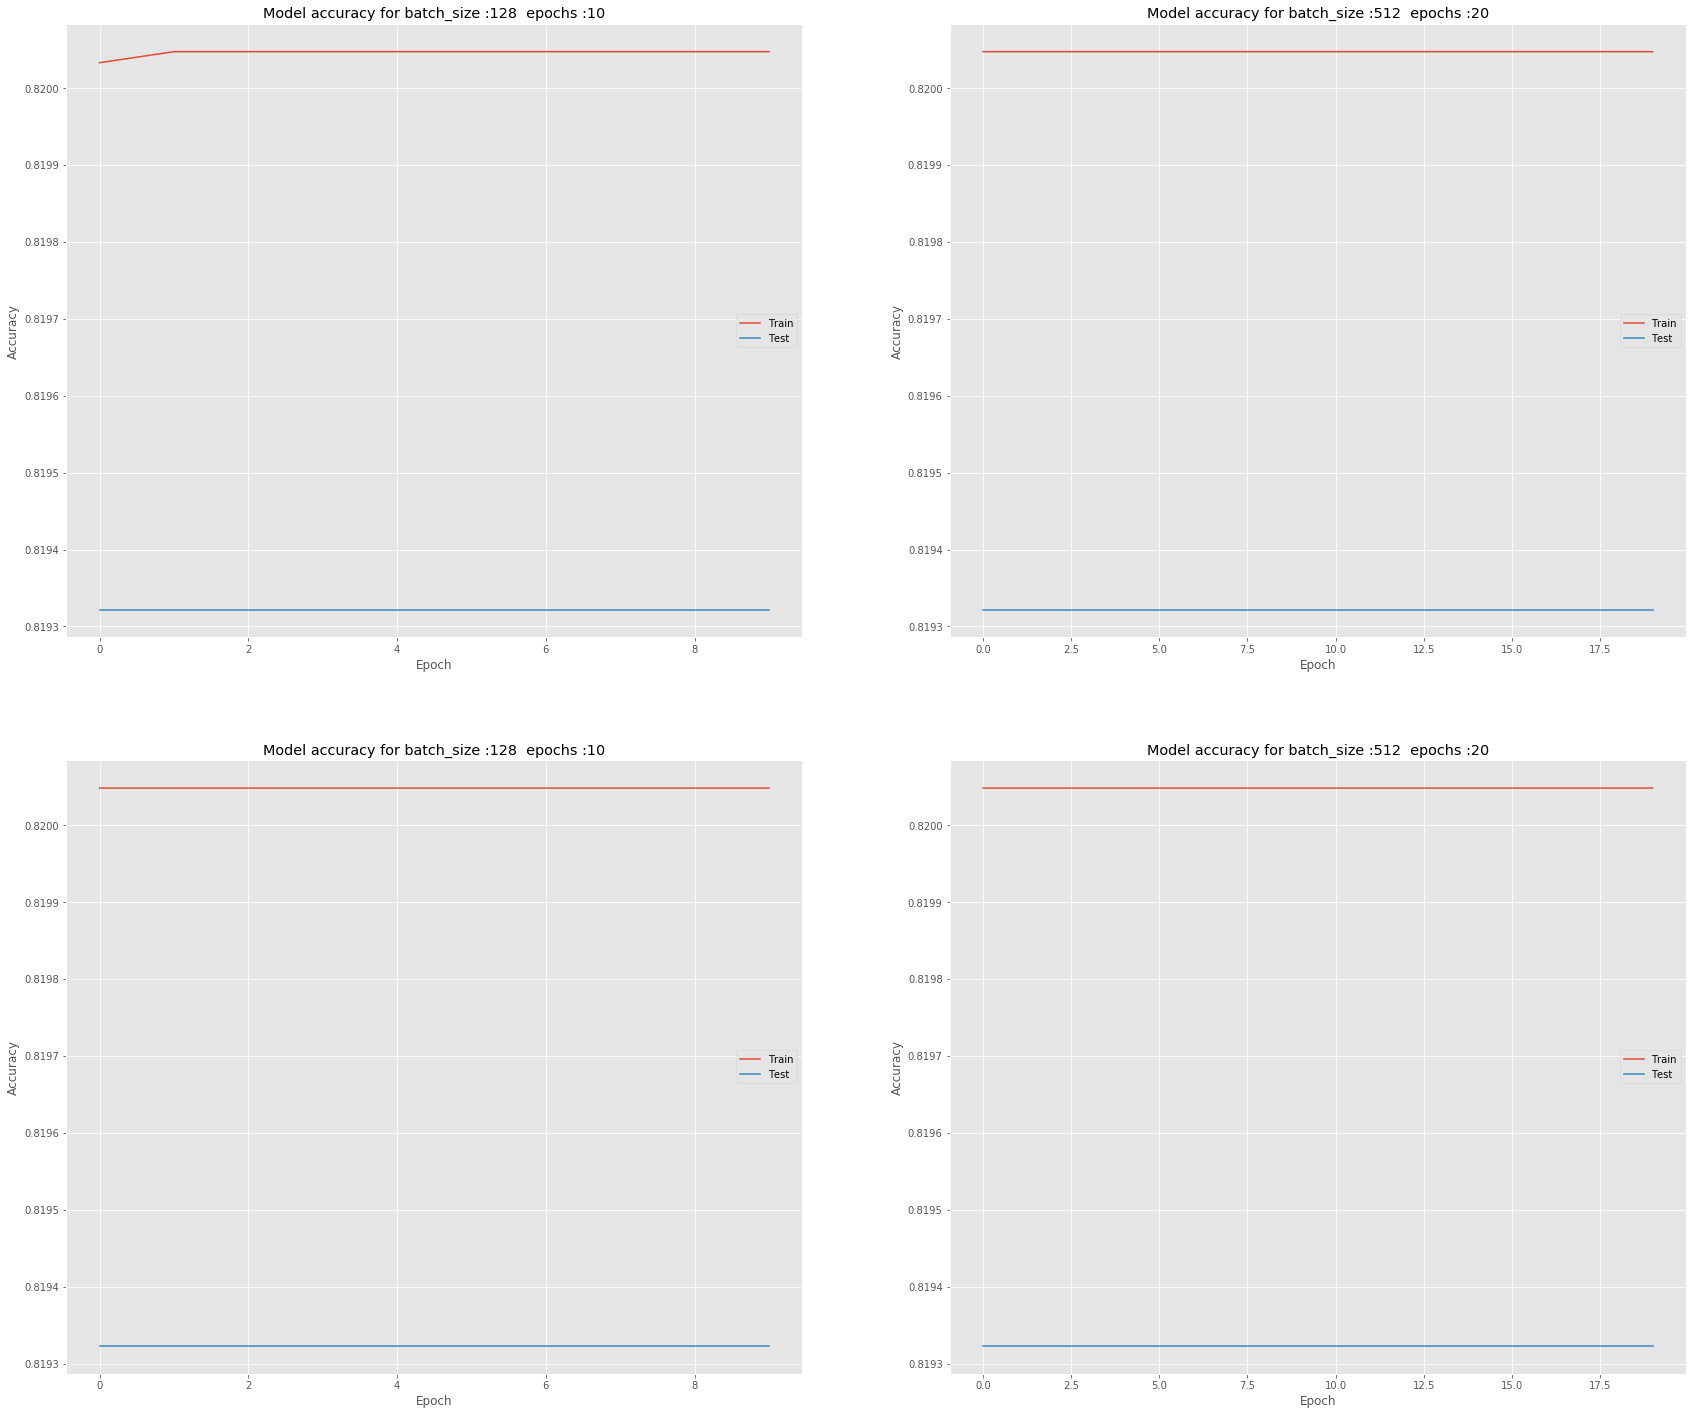

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Plot training & validation accuracy values
plt.figure(figsize = (12, 10))
plt.subplots_adjust(left=None, bottom=None, right=2, top=2, wspace=None, hspace=None)
for i in range(len(history_assembly)):
    plt.subplot(2, 2, i+1)
    j = i % 2
    plt.plot(history_assembly[i].history['acc'])
    plt.plot(history_assembly[i].history['val_acc'])
    plt.title('Model accuracy for ' + 'batch_size :'+ str(batch_size[j]) +'  epochs :' + str(epochs[j]))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
plt.show()

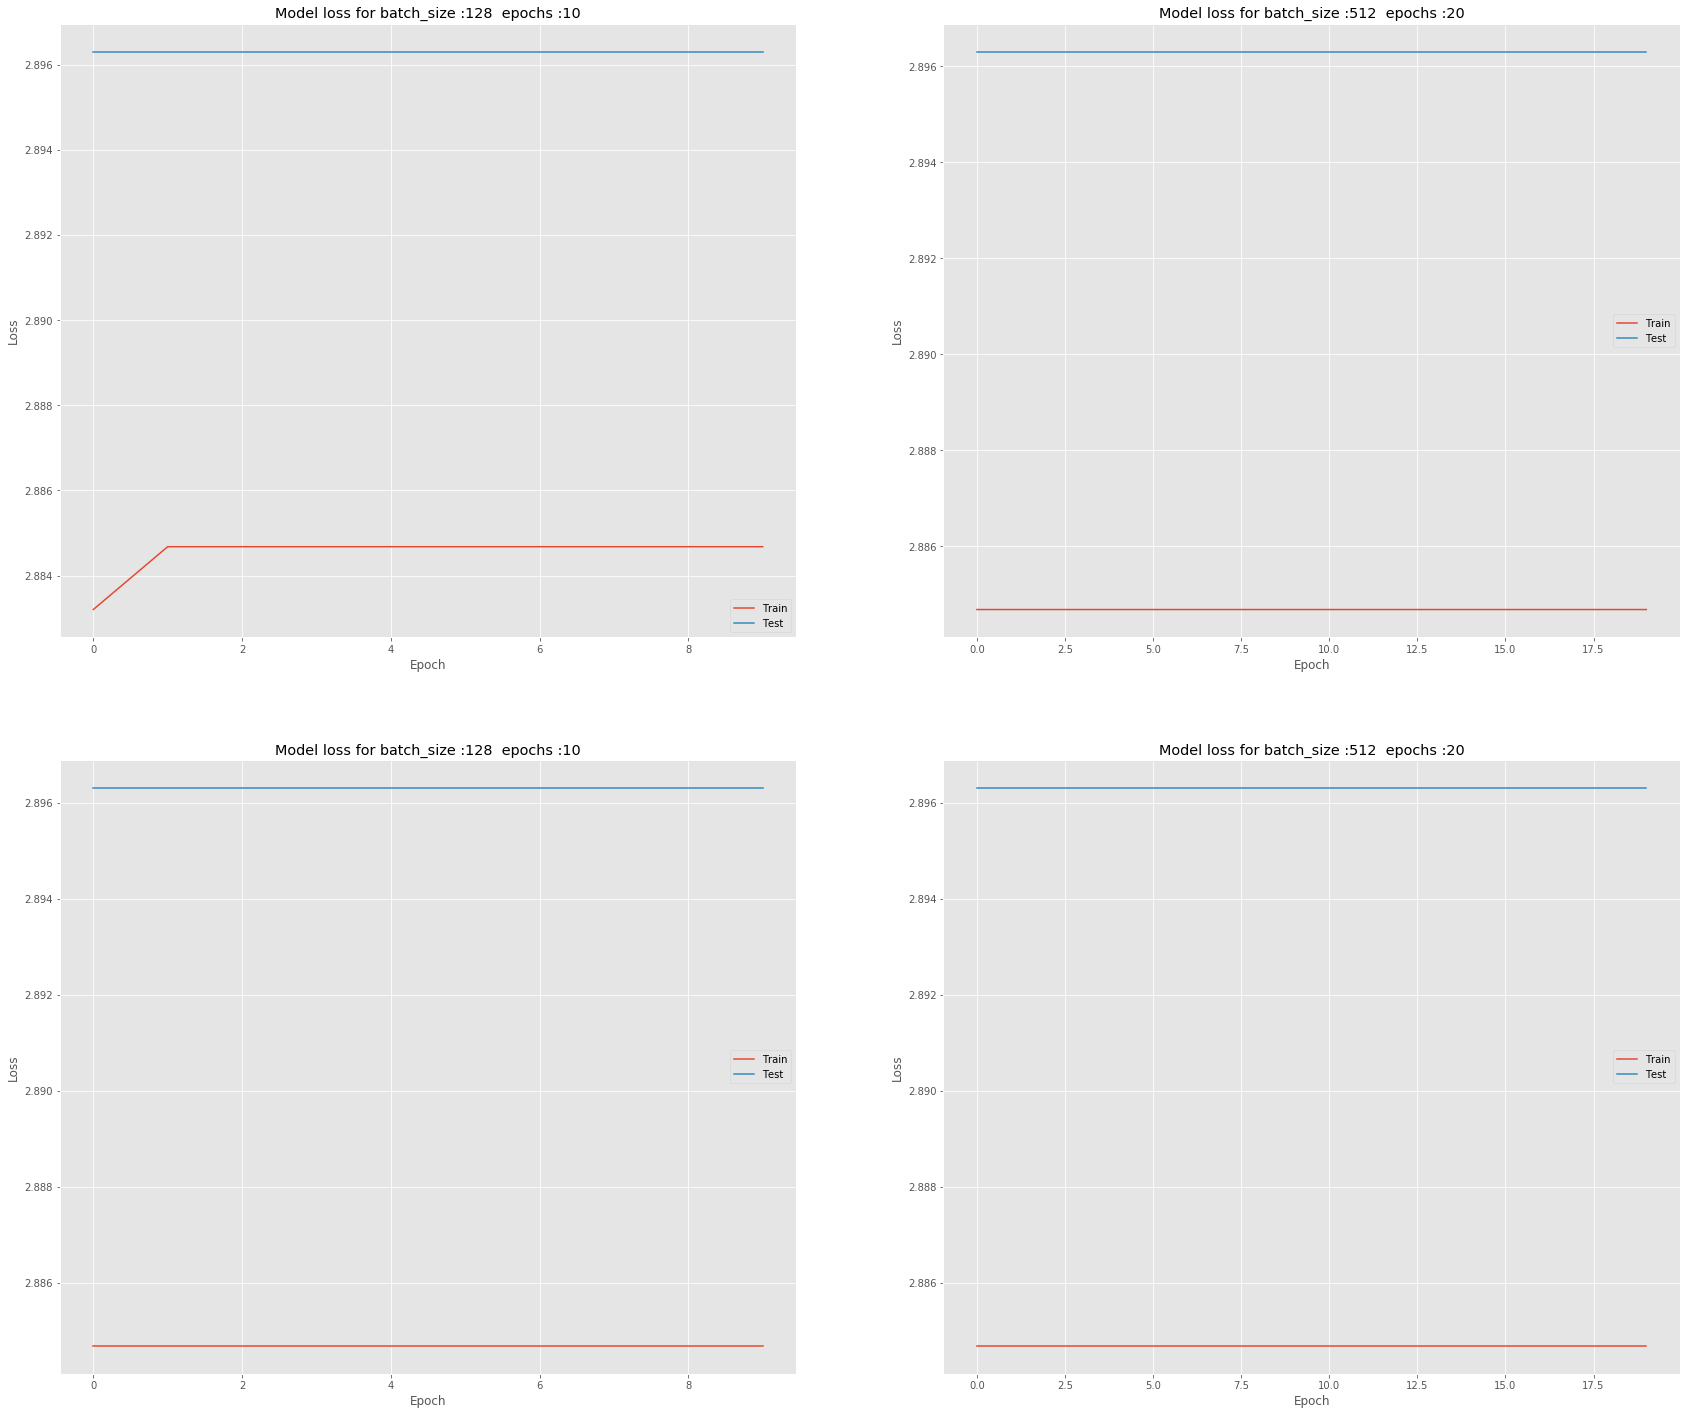

In [11]:
# Plot training & validation loss values
plt.figure(figsize = (12, 10))
plt.subplots_adjust(left=None, bottom=None, right=2, top=2, wspace=None, hspace=None)
for i in range(len(history_assembly)):
    plt.subplot(2, 2, i+1)
    j = i % 2
    plt.plot(history_assembly[i].history['loss'])
    plt.plot(history_assembly[i].history['val_loss'])
    plt.title('Model loss for ' + 'batch_size :'+ str(batch_size[j]) +'  epochs :' + str(epochs[j]))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
plt.show()

#### 以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [12]:
def fit_model(model, opt):
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = model.fit(X_train,Y_train, batch_size = 128, epochs = 10, shuffle = True, verbose = 2, validation_split = 0.3 )
    return history

In [13]:
def plot_output(history):
    plt.figure(figsize = (16, 9))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
         
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

'''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop - Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''

In [14]:
# 第一步：選擇模型, 順序模型是多個網絡層的線性堆疊 
model = Sequential()

# 第二步：構建網絡層 
model.add(Dense( 500,input_shape=(784,))) # 輸入層，28 * 28 = 784   
model.add(Activation('relu')) # 激活函數是 relu   

model.add(Dense( 500)) # 隱藏層節點 500 個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點 500 個   
model.add(Activation('relu'))  

model.add(Dense( 500)) # 隱藏層節點 500 個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是 1 個類別，所以維度是 10   
model.add(Activation('softmax')) # 最後一層用 softmax 作為激活函數

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 12s - loss: 1.0384 - acc: 0.9201 - val_loss: 0.3319 - val_acc: 0.9529
Epoch 2/10
 - 12s - loss: 0.0786 - acc: 0.9842 - val_loss: 0.0739 - val_acc: 0.9842
Epoch 3/10
 - 12s - loss: 0.0376 - acc: 0.9908 - val_loss: 0.0655 - val_acc: 0.9857
Epoch 4/10
 - 12s - loss: 0.0220 - acc: 0.9944 - val_loss: 0.0643 - val_acc: 0.9856
Epoch 5/10
 - 12s - loss: 0.0132 - acc: 0.9966 - val_loss: 0.0547 - val_acc: 0.9877
Epoch 6/10
 - 12s - loss: 0.0083 - acc: 0.9982 - val_loss: 0.0558 - val_acc: 0.9872
Epoch 7/10
 - 12s - loss: 0.0058 - acc: 0.9989 - val_loss: 0.0537 - val_acc: 0.9879
Epoch 8/10
 - 12s - loss: 0.0043 - acc: 0.9993 - val_loss: 0.0523 - val_acc: 0.9884
Epoch 9/10
 - 12s - loss: 0.0032 - acc: 0.9996 - val_loss: 0.0522 - val_acc: 0.9887
Epoch 10/10
 - 12s - loss: 0.0026 - acc: 0.9997 - val_loss: 0.0519 - val_acc: 0.9889


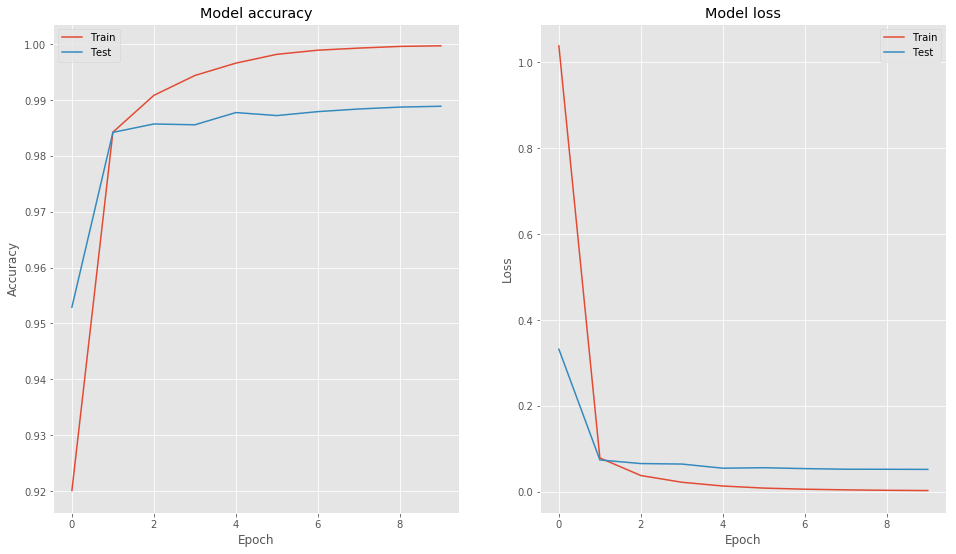

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 14s - loss: 2.8890 - acc: 0.8198 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 2/10
 - 13s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 3/10
 - 14s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 4/10
 - 13s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 5/10
 - 13s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 6/10
 - 13s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 7/10
 - 13s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 8/10
 - 13s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 9/10
 - 14s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201
Epoch 10/10
 - 13s - loss: 2.8977 - acc: 0.8192 - val_loss: 2.8835 - val_acc: 0.8201


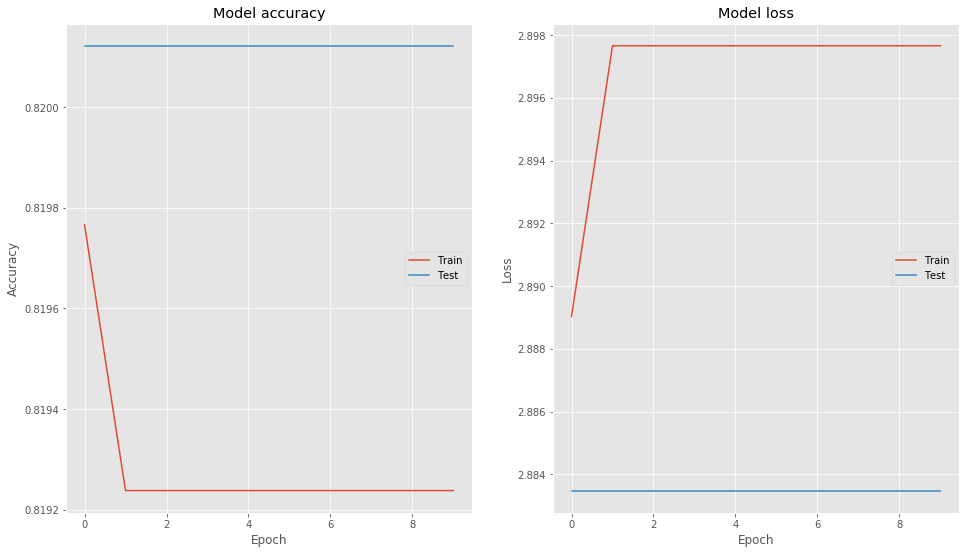

In [15]:
opts=['SGD', 'Rmsprop']

for opt in opts:
    history = fit_model(model, opt)
    plot_output(history)